版权声明：本材料是南开大学“非线性物理学导论”课程课件，版权归课程老师朱开恩所有。允许拷贝、分发使用，允许修改，但是请保留此版权声明。

版本时间：2019年9月

%matplotlib qt

%matplotlib inline

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

<font size=6 color='purple'>     庞加莱截面：微分方程$\longrightarrow$迭代映射 </font>

# Logistic映射

## $x_{n+1}=a x_n$

## $x_{n+1}=a x_n(1-x_n)$

$$x_{n+1}=a x_n(1-x_n)$$

<font size=4 color='purple'> 注意方程的行为随着a的变化 </font>

In [2]:
def f(x, a, count=1):
    for i in range(count):
        x = a*x*(1-x)
    return x

def Logistic(x0, a, N, count=1):
    xn = np.zeros(N)
    xn[0] = x0
    for i in range(N-1):
        xn[i+1] = f(xn[i],a, count)
    return xn

def plot_Logistic(x0, a, N, count=1):
    if type(x0)!=list:
        x0 = [x0,]
    for item in x0:
        plt.plot(np.arange(N), Logistic(item, a, N, count))
    plt.show()
    
def plot_Logistic_func(a, count=1, lim=None, plot_more=False):
    N = 500
    x = np.linspace(0.,1.,N+1)
    y = f(x,a,count)
    plt.plot(x, y, label='a=%f, count=%d' % (a,count))
    plt.title('$f^{(%d)}(x,a)$ function' % count)
    plt.gca().set_aspect('equal')
    if lim is not None:
        plt.xlim(lim)
        plt.ylim(lim)
    if not plot_more:
        plt.plot(x, x)
        plt.legend()
        plt.show()

In [3]:
x0 = 0.23; N = 30; x0_2 = 0.8

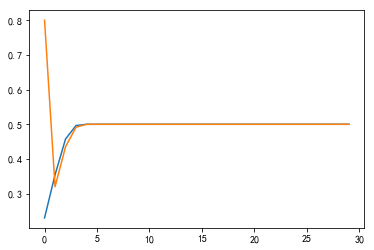

In [4]:
a = 2.0; plot_Logistic([x0, x0_2], a, N)

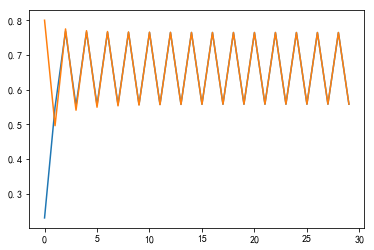

In [5]:
a = 3.1; plot_Logistic([x0, x0_2], a, N)

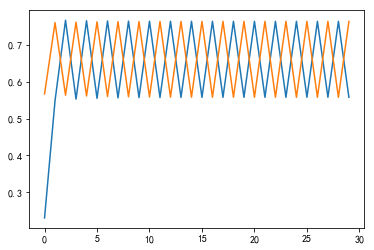

In [6]:
a = 3.1; plot_Logistic([x0, 0.567], a, N)

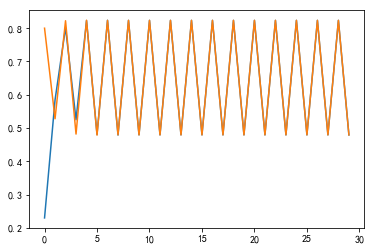

In [7]:
a = 3.3; plot_Logistic([x0, x0_2], a, N)

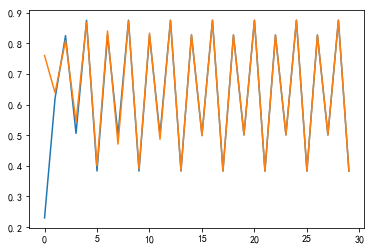

In [8]:
a = 3.5; plot_Logistic([x0, 0.76], a, N)

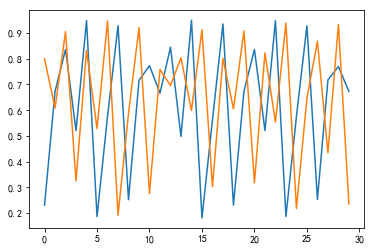

In [9]:
a = 3.8; plot_Logistic([x0, x0_2], a, N)

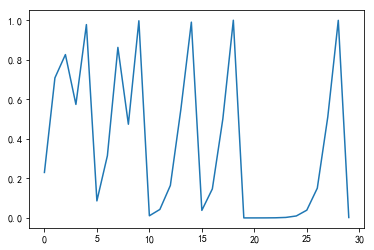

In [10]:
a = 4.0; plot_Logistic(x0, a, N)

# 拉伸与折叠
复杂行为的来源！

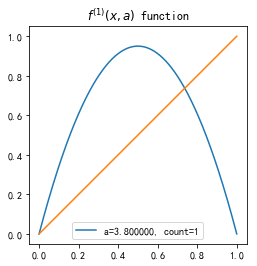

In [11]:
plot_Logistic_func(3.8)

# 周期2的吸引域

$$ a=3.1 $$
$$f(x) = ax(1-x)$$
$$x_{n+1}=f(x_n)$$

周期2：$$x_{n+2}=x_n$$

In [18]:
a = 3.1

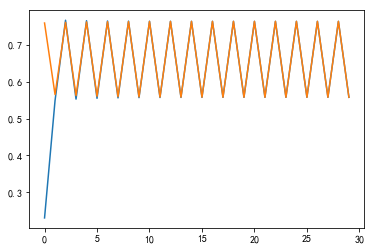

In [19]:
plot_Logistic([0.23, 0.76], a, N)

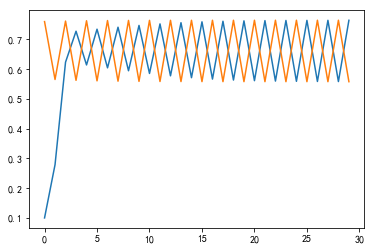

In [21]:
plot_Logistic([0.1, 0.76], a, N)

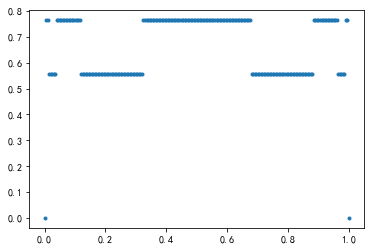

In [112]:
N2 = 201
N = 100
x_init = np.linspace(0,1,N2)
xns = []
for item in x_init:
    xns.append( Logistic(item, a, N) )
xns = np.vstack(xns)
plt.plot(xns[:,0], xns[:,-1], '.')

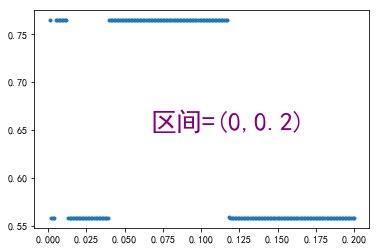

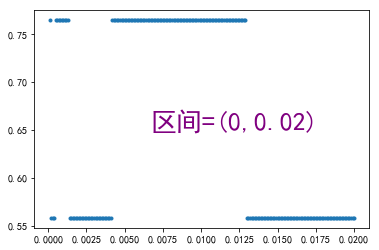

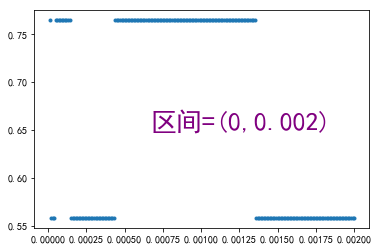

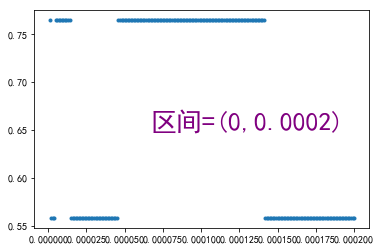

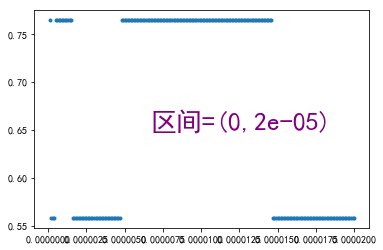

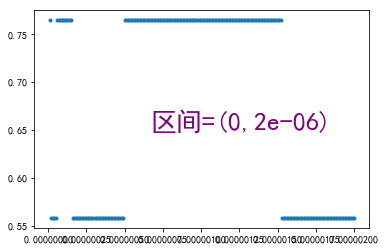

In [136]:
ends = [0.2, 0.02, 0.002, 0.0002, 0.00002, 0.000002]
for end in ends:
    N2 = 201
    N = 100
    x_init = np.linspace(0,end,N2)[1:]
    xns = []
    for item in x_init:
        xns.append( Logistic(item, a, N) )
    xns = np.vstack(xns)
    plt.figure()
    plt.plot(xns[:,0], xns[:,-1], '.')
    plt.text(end/3, 0.65, '区间=(0,{})'.format(end), fontsize=26, color='purple')

<font size=6 color='purple'>  层层嵌套、无穷细节！ </font>

# 蛛网图法

## $y=a x(1-x)$
$$y=a x(1-x)$$

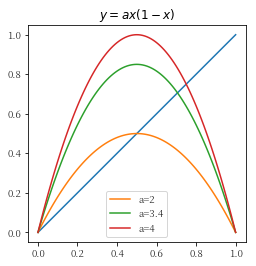

In [11]:
a = 2; a2= 3.4; a3 = 4
N = 100
x = np.linspace(0.,1.,N+1)
y = f(x,a)
y2 = f(x,a2)
y3 = f(x,a3)

plt.plot(x, x)
plt.plot(x, y, label='a='+str(a))
plt.plot(x, y2, label='a='+str(a2))
plt.plot(x, y3, label='a='+str(a3))
plt.title('$y=ax(1-x)$')
plt.gca().set_aspect('equal')
plt.legend()
plt.show()

## cobweb method

In [12]:
x0 = 0.23; N = 100
a = 3.8
xn = Logistic(x0, a, N)

In [1]:
def plot_cobweb(x0, a, N, N_func, discard = None, lim=None, count=1):
    x = np.linspace(0.,1.,N_func+1)
    y = f(x,a,count)

    xn = Logistic(x0, a, N, count)

    cob = []
    for i in range(len(xn)-1):
        cob.append(np.array([xn[i], xn[i]]))
        cob.append(np.array([xn[i], xn[i+1]]))
    cob[0][1] = 0
    cob = np.array(cob)
    if discard is not None and N > discard:
        cob = cob[discard:]

    plt.plot(x, y)
    plt.plot(x, x)
    plt.plot(cob[:,0], cob[:,1])

    plt.title('cobweb')
    plt.gca().set_aspect('equal')
    if lim is not None:
        plt.xlim(lim)
        plt.ylim(lim)
    plt.show()

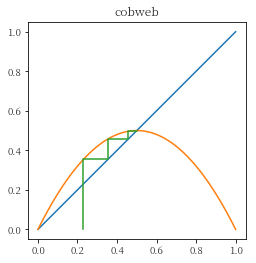

In [14]:
x0 = 0.23
a = 2
N = 200
N_func = 100
plot_cobweb(x0, a, N, N_func)

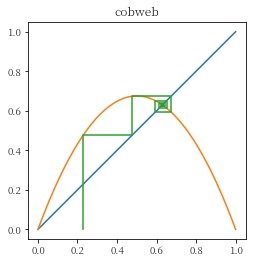

In [15]:
x0 = 0.23
a = 2.7
N = 200
N_func = 100
plot_cobweb(x0, a, N, N_func)

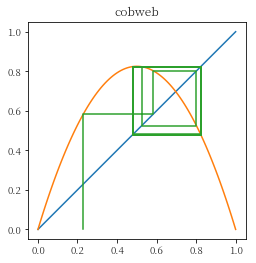

In [16]:
x0 = 0.23
a = 3.3
N = 200
N_func = 100
plot_cobweb(x0, a, N, N_func)

<font size=4 color='purple'>  去掉暂态过程 </font>

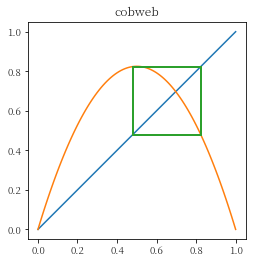

In [17]:
x0 = 0.23
a = 3.3
N = 200
N_func = 100
plot_cobweb(x0, a, N, N_func, 100)

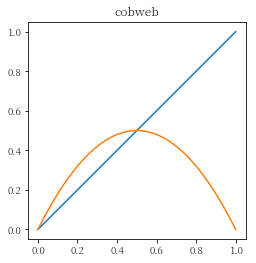

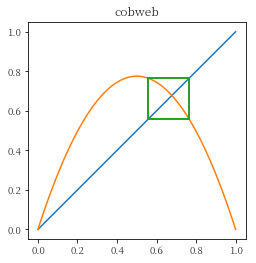

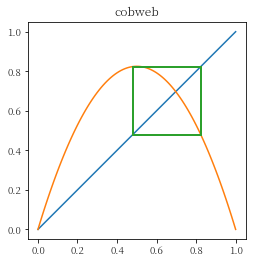

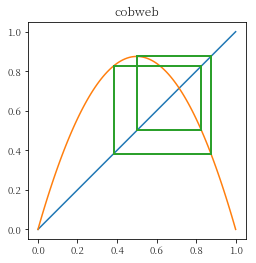

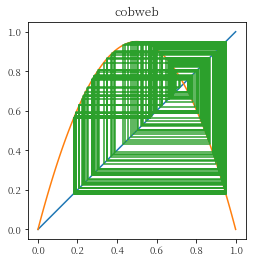

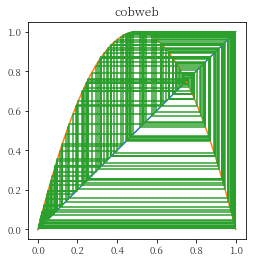

In [18]:
x0 = 0.23
a = [2.0, 3.1, 3.3, 3.5, 3.8, 4.0]
N = 200
N_func = 100
for item in a:
    plot_cobweb(x0, item, N, N_func, 100)

<img src="LogisticCobwebChaos.gif" width="65%"/>
图片来自：
https://en.wikipedia.org/wiki/Logistic_map

# 周期解的稳定性分析

## 不动点（周期1）

### 稳定性分析

一般的迭代方程：
$$x_{n+1}=F(x_n)$$

不动点: $$ F(x_n)=x_n$$
其解设为$x_f$。设在不动点附近有小扰动，在不动点展开得 $$x_f+\epsilon_{n+1} = F(x_f+\epsilon_n)$$
当$\epsilon_n \rightarrow 0$时
$$x_f+\epsilon_{n+1} = x_f+ F'(x_f) \epsilon_n $$
$$\epsilon_{n+1} =F'(x_f) \epsilon_n $$
$$\left|\frac{\epsilon_{n+1}}{\epsilon_n}\right| =\left|F'(x_f)\right| $$
稳定条件为： $$\left|F'(x_f)\right| < 1$$

### 应用到Logistics映射

不动点 
$$ a x_f(1-x_f) = x_f$$
$$ x_{f1} = 0$$
$$ x_{f2} = 1-\frac{1}{a}$$
第一个不动点：
$$\left|F'(x_{f1})\right|= a(1-2x_{f1})= a$$
$$ a< 1$$
第二个不动点：
$\left|F'(x_{f2})\right|= a(1-2x_{f2})= a(1-2(1-\frac{1}{a}) = 2-a$
$$|2-a|< 1$$
$$1<a<3$$

In [19]:
def plot_Logistic_bifurcation(a):
    x0 = 0.23
    N = 500
    discard = 100
    bins = len(a)
    data = np.zeros((bins, (N-discard), 2))
    for i in range(bins):
        xn = Logistic(x0, a[i], N)[discard:]
        data[i, :, 0] = a[i]
        data[i, :, 1] = xn
    data = data.reshape((bins*(N-discard),2))
    plt.plot(data[:,0], data[:,1], '.', markersize=1)
    plt.show()

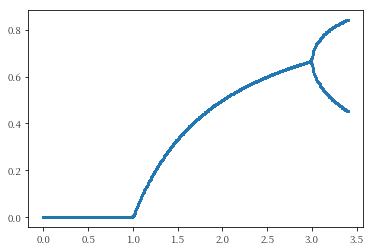

In [20]:
a = np.linspace(0.,3.4, 401)
plot_Logistic_bifurcation(a)

### 切线斜率的影响

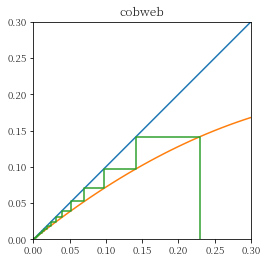

In [21]:
x0 = 0.23
a = 0.8
N = 200
N_func = 100
plot_cobweb(x0, a, N, N_func, lim=[0.,0.3])

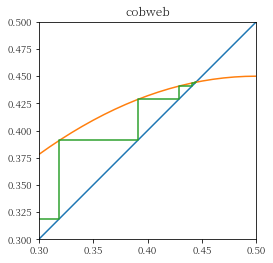

In [22]:
x0 = 0.23
a = 1.8
N = 200
N_func = 100
plot_cobweb(x0, a, N, N_func, lim=[0.3,0.5])

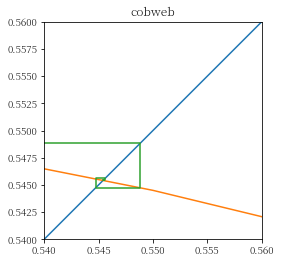

In [23]:
x0 = 0.23
a = 2.2
N = 200
N_func = 100
plot_cobweb(x0, a, N, N_func, lim=[0.54,0.56])

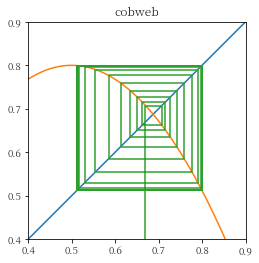

In [24]:
x0 = 0.67
a = 3.2
N = 200
N_func = 100
plot_cobweb(x0, a, N, N_func, lim=[0.4,0.9])

### 不稳定的不动点

$$ x_{f2} = 1-\frac{1}{a}$$

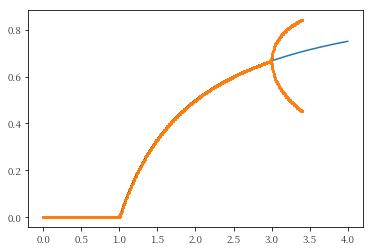

In [25]:
a = np.linspace(1.0, 4.0, 100)
plt.plot(a, 1.0-1.0/a)
a = np.linspace(0.,3.4, 401)
plot_Logistic_bifurcation(a)

当分岔参量取值增大时，原来稳定的周期轨道不断地变得不稳定，并出现新的稳定轨
道。但新的稳定轨道的出现并不意味着原来轨道不存在，而只是说原来轨道是以不稳定的形式存在于新的稳定状态中。

## 周期2

令 $$x_{n+1}=F^{(2)}(x_n)=F(F(x_n))$$
则原来的映射的周期2的解变为新映射的两个不动点$p_1,p_2$,
$$p_2=F(p_1), \quad p_1=F(p_2)$$
$$p_1=F(F(p_1))$$
$$p_2=F(F(p_2))$$
稳定性条件为
$$\frac{d}{dx}F(F(p_2)) = \left|F'(p_1) \cdot F'(p_2)\right|< 1$$

应用到Logistic映射
$$\left|a(1-2p_1)\cdot a(1-2p_2)\right|<1$$

先求周期解，解方程$F(F(x))=x$，即 $a^2x(1-x) (1-ax(1-x))-x=0$，因为不动点$F(x)=x$也满足此方程，去掉不动点的解后再求解
$$\frac{a^2x(1-x) (1-ax(1-x))-x}{ax(1-x)-x}=0$$

下面用计算机帮助化简和解方程

In [26]:
import sympy as sp
sp.init_printing()

In [28]:
x = sp.Symbol("x")
a = sp.Symbol("a")
fexpr = f(x,a,2)-x
fexpr

In [29]:
fexpr.factor()

因为满足$$F(x)=x$$
的不动点也满足周期2的方程
$$F(F(x))=x$$
所以需要扣除掉不动点

In [30]:
g = sp.simplify( fexpr.factor()/(f(x,a)-x) )
g

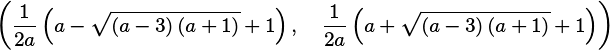

In [31]:
p1,p2 = sp.solve(g, x)
p1,p2

代入稳定性条件 $$\left|a(1-2p_1)\cdot a(1-2p_2)\right|<1$$ 得

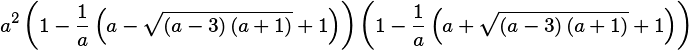

In [32]:
a*(1-2*p1) * a*(1-2*p2)

In [33]:
stable = sp.expand(a**2 *(1-2*p1) * (1-2*p2))
stable

In [34]:
sp.solve(stable-1)

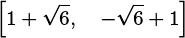

In [35]:
sp.solve(stable-(-1))

得到稳定范围为：
$$(3,\sqrt{6}+1)=(3,3.4494897...)$$

## 周期m
以此类推，
令 $$x_{n+1}=F^{(m)}(x_n)$$
则原来的映射的周期$m$的解变为新映射的$n$个不动点$p_1,p2,\cdots, p_m$,
$$p_1=F^{(m)}(p_1)$$
$$\cdots$$
稳定性条件为
$$\frac{d}{dx}F^{(m)}(x_n) = \left|F'(p_1) \cdot F'(p_2) \cdots F'(p_m)\right|< 1$$

### 尝试解析推导周期4

In [36]:
fexpr4 = f(x,a,4)-x
fexpr4

In [37]:
fexpr4.factor()

In [38]:
ss = fexpr4.factor()/fexpr.factor()
ss

In [39]:
ss2 = sp.simplify(ss.collect(x))
ss2

In [40]:
sp.solve(ss2, x)

如何处理周期3~8得到的这些方程，请参看 http://mathworld.wolfram.com/LogisticMap.html

# 倍周期分岔
相似性，规律性

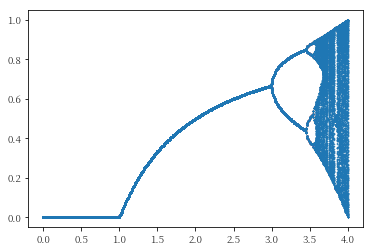

In [41]:
a = np.linspace(0.,4.0, 401)
plot_Logistic_bifurcation(a)

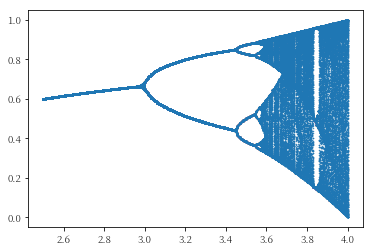

In [42]:
a = np.linspace(2.5,4.0, 401)
plot_Logistic_bifurcation(a)

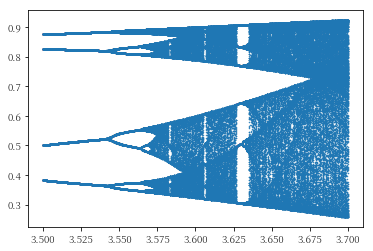

In [43]:
a = np.linspace(3.5,3.7, 401)
plot_Logistic_bifurcation(a)

# 费根鲍姆常数
## 数值方法求常数

z终端下执行：

cd 03

python3 bifur_generate_Logistic.py 0.0 4.0 2001

python3 bifur_generate_Logistic.py 3.56  3.576 2001

得

In [44]:
a_n = np.array([1.0, 3.0, 3.45, 3.544, 3.5644, 3.5688, 3.5697])

In [45]:
a_diff = a_n[1:] - a_n[:-1]

In [46]:
delta = a_diff[:-1]/a_diff[1:]
print(delta)
print(delta.mean())
print((delta.mean()-4.6692016091)/4.6692016091*100, '%')

[ 4.44444444  4.78723404  4.60784314  4.63636364  4.88888889]
4.6729548299
0.0803824960902 %


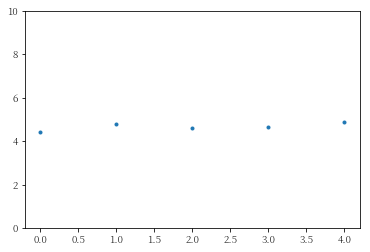

In [47]:
plt.plot(delta, '.')
plt.ylim(0,10)
plt.show()

<font size=6 color='purple'> 我们求出的平均值： 4.6729 <br /> </font>

<font size=6 color='purple'> <br /> 精确值：$\delta$ = 4.66920 16091 02990 67185 ....<br />  </font>

<font size=6 color='purple'> <br /> 误差：0.0804%</font>

<font size=6 color='purple'> 还有另一个常数 $\alpha=2.5029...$  </font>

## Mitchell Jay Feigenbaum 的理论

<font size=6 color='purple'> 数值求出的临界点：$a_\infty$ = 3.56995  </font>

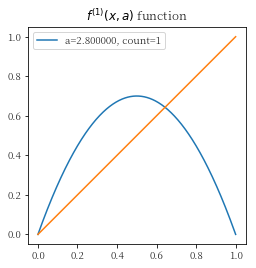

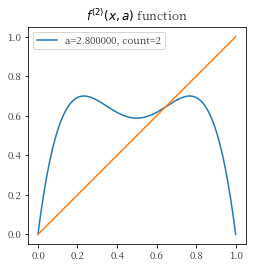

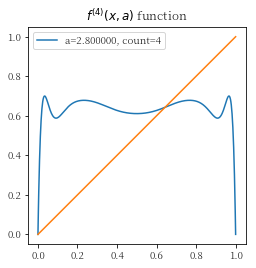

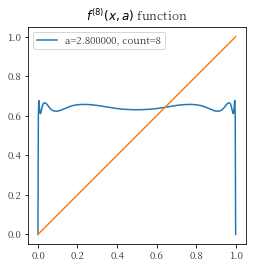

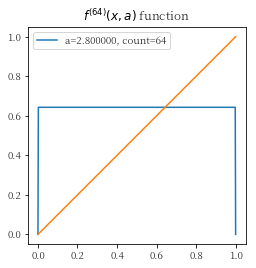

In [48]:
a = 2.8
plot_Logistic_func(a, 1)
plot_Logistic_func(a, 2)
plot_Logistic_func(a, 4)
plot_Logistic_func(a, 8)
plot_Logistic_func(a, 64)

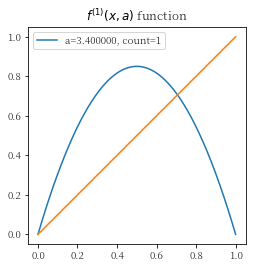

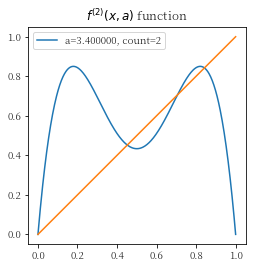

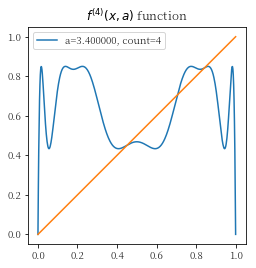

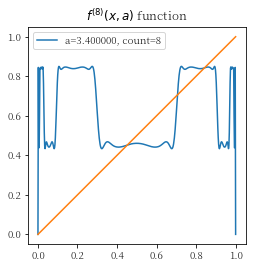

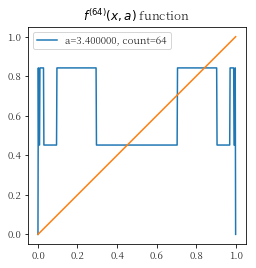

In [49]:
a = 3.4
plot_Logistic_func(a, 1)
plot_Logistic_func(a, 2)
plot_Logistic_func(a, 4)
plot_Logistic_func(a, 8)
plot_Logistic_func(a, 64)

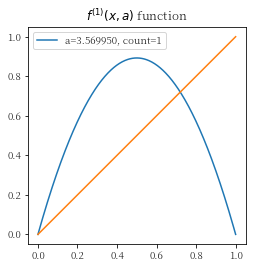

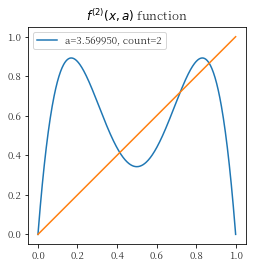

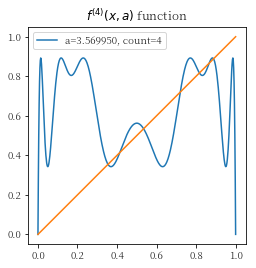

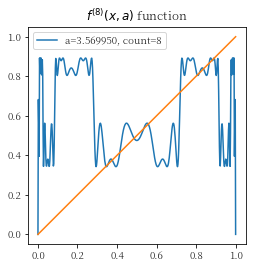

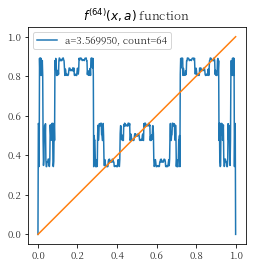

In [50]:
a = 3.56995
plot_Logistic_func(a, 1)
plot_Logistic_func(a, 2)
plot_Logistic_func(a, 4)
plot_Logistic_func(a, 8)
plot_Logistic_func(a, 64)

# 周期3、切分岔与阵发混沌

## 周期3的产生

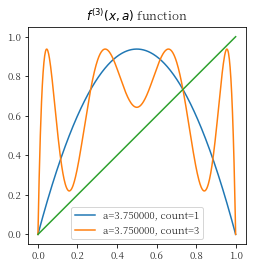

In [51]:
a = 3.75
plot_Logistic_func(a,1, plot_more=True)
plot_Logistic_func(a,3)

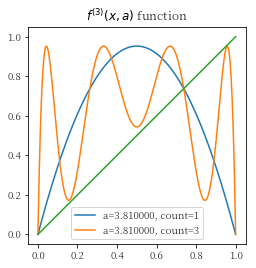

In [52]:
a = 3.81
plot_Logistic_func(a,1, plot_more=True)
plot_Logistic_func(a,3)

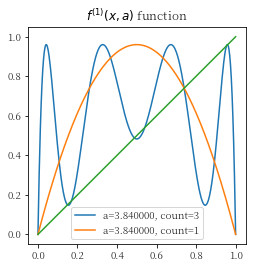

In [53]:
a = 3.84
plot_Logistic_func(a,3, plot_more=True)
plot_Logistic_func(a,1)

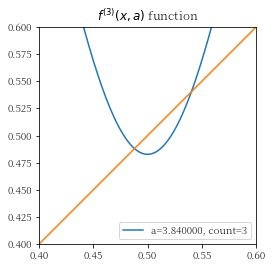

In [54]:
plot_Logistic_func(a,3, lim=(0.4,0.6))

产生两套周期3，一套是不稳定的，另一套是稳定的。
$$p_2=F(p_1), \quad p_3=F(p_2), \quad p_1=F(p_3)$$
$$p_1=F(F(p_1))$$
$$p_2=F(F(p_2))$$
$$p_3=F(F(p_3))$$
$$p_2'=F(p_1'), \quad p_3'=F(p_2'), \quad p_1'=F(p_3')$$
$$p_1'=F(F(p_1'))$$
$$p_2'=F(F(p_2'))$$
$$p_3'=F(F(p_3'))$$

那么，周期3的起始点在哪里？就在两套周期点合二为一的时候，这时
$$ g(x,a)=\frac{f^{(3)}(x,a)-x}{f(x,a)-x}$$
应该可以表示为完全平方
$$ g(x,a)=(Ax^3+Bx^2+Cx+D)^2$$
从而$$g(x,a)=0$$有重根。

In [56]:
x = sp.Symbol("x")
a = sp.Symbol("a")
fexpr3 = f(x,a,3)-x
fexpr3

In [57]:
fexpr3.factor()

因为满足$$F(x)=x$$
的不动点也满足周期3的方程
$$F^{(3)}(x)=x$$
所以需要扣除掉不动点

In [58]:
ss3 = sp.simplify( fexpr3.factor()/(f(x,a)-x) )
ss3

In [59]:
ss3 = sp.simplify(ss3.collect(x))
ss3

In [60]:
for i in range(1,7):
    print('--- %d ---'%i)
    coe = ss3.coeff(x**i)
    display(coe)
    display(coe.factor())

--- 1 ---


--- 2 ---


--- 3 ---


--- 4 ---


--- 5 ---


--- 6 ---


In [61]:
A,B,C,D = sp.symbols("A B C D")

In [62]:
g = (A*x**3+B*x**2+C*x+D)**2
g

In [63]:
g = g.expand()
g = sp.simplify(g.collect(x))
g

比较这连个表达式和上面的表达式的系数，我们有

In [64]:
eqall = []
for i in range(1,7):
    #print('--- %d ---'%i)
    coe = ss3.coeff(x**i).factor()
    coe2 = g.coeff(x**i).factor()
    eq = sp.Eq(coe2,coe)
    display(eq)
    eqall.append(coe2-coe)
    #print(sp.latex(eq))

加上常数项相等的方程
$$D^2=a^2+a+1$$

下面准备求解。由$$ g(x,a)=(Ax^3+Bx^2+Cx+D)^2$$
是完全平方，总是可以选择$A>0$，再来定其它系数，
于是得到
$$A=a^3$$
$$B=-\frac{1}{2}a^2(3a+1)$$
以及$C$和$D$异号，
再由 $$2 A C + B^{2} = a^{4} \left(a + 1\right) \left(3 a + 1\right)$$得
$$2 A C = \frac{1}{4} a^4 (3a+1)(a+3) > 0$$
可知 $A$和$C$同号。
于是$A,C>0$而$B,D<0$，进而
$$D=-\sqrt{a^2+a+1}$$
$$C=\frac{1}{2}a(a+1) \sqrt{a^2+a+1}$$

除去用到的条件，还剩三个公式需要满足：
$$2 B D + C^{2} = a^{2} \left(2 a + 1\right) \left(a^{2} + a + 1\right)$$
$$2 \left(A D + B C\right) = - a^{3} \left(a^{3} + 5 a^{2} + 3 a + 1\right)$$
$$2 A C + B^{2} = a^{4} \left(a + 1\right) \left(3 a + 1\right)$$

In [65]:
eqall[1]

In [66]:
eqall[2]

In [67]:
eqall[3]

In [68]:
sub_dict = {A: a**3, B: a**2*(3*a+1)*(-1)/2, C: a*(a+1)*sp.sqrt(a**2+a+1)/2, D: sp.sqrt(a**2+a+1)*(-1)}
R = sp.Symbol('R')

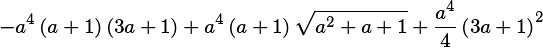

In [69]:
eqall[3].subs(sub_dict)

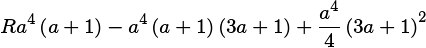

In [70]:
eqall[3].subs(sub_dict).subs({sp.sqrt(a**2+a+1): R})

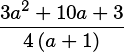

In [71]:
RT1 = sp.solve(eqall[3].subs(sub_dict).subs({sp.sqrt(a**2+a+1): R}), R)[0]
RT1

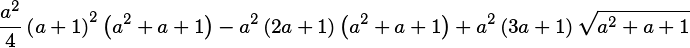

In [72]:
eqall[1].subs(sub_dict)

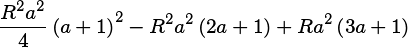

In [73]:
eqall[1].subs(sub_dict).subs({sp.sqrt(a**2+a+1): R, a**2+a+1:R**2})

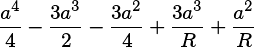

In [74]:
RS = (eqall[1].subs(sub_dict).subs({sp.sqrt(a**2+a+1): R, a**2+a+1:R**2})/R**2).expand()
RS

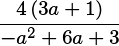

In [75]:
RT2 = sp.solve(RS, R)[0]
RT2

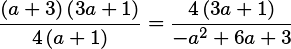

In [76]:
sp.Eq(RT1,RT2).factor().simplify()

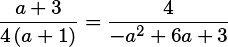

In [77]:
RT_EQ = sp.Eq(RT1/(3*a+1),RT2/(3*a+1)).factor().simplify()
RT_EQ

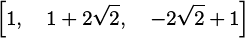

In [78]:
sp.solve(RT_EQ, a)

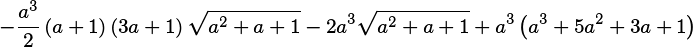

In [79]:
eq2 = eqall[2].subs({A: a**3, B: a**2*(3*a+1)*(-1)/2, C: a*(a+1)*sp.sqrt(a**2+a+1)/2, D: sp.sqrt(a**2+a+1)*(-1)})
eq2

把$a=1$代入验证，不成立

In [80]:
eq2.subs(a,1)

把$a=1+2\sqrt{2}$代入验证，结果等式成立：

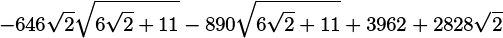

In [81]:
VS = eq2.subs(a, 1+2*sp.sqrt(2)).expand()
VS

因为$(\sqrt{2}+3)^2=6\sqrt{2}+11$,所以

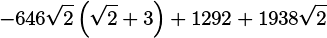

In [82]:
VS1 = VS.subs(6*sp.sqrt(2)+11, (sp.sqrt(2)+3)**2)
display(VS1)
VS1.expand()

得到周期3起始值为：
$$1+2\sqrt{2}$$

## 切分岔
因为是与$y=x$直线相切而开始产生的周期，故名。

## 阵发混沌

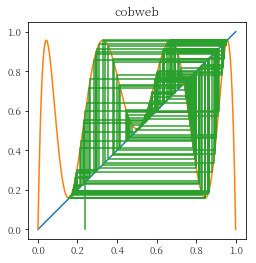

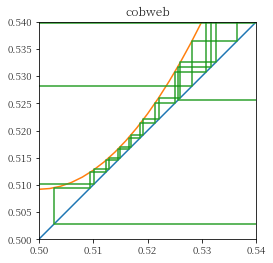

In [83]:
x0 = 0.24
a = 1+2*np.sqrt(2)-0.001
N = 200
N_func = 500
plot_cobweb(x0, a, N, N_func, count=3)
plot_cobweb(x0, a, N, N_func, count=3, lim=(0.5,0.54))

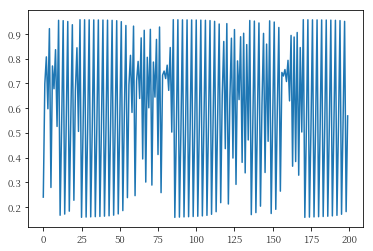

In [84]:
plt.plot(np.arange(N), Logistic(x0,a,N))
plt.show()

# 三生万物
中国古人感悟世界与现代科学

http://www.awaker.cn/75600.html

## 沙尔可夫斯基定理
Sharkovskii's theorem

 用$≺$表示“领先”，那么映射周期解排列顺序为：
 $$3≺5≺7≺9≺11≺13≺15≺...$$
 $$≺2·3≺2·5≺2·7≺2·9≺...$$
 $$≺2^2·3≺2^2·5≺2^2·7 ≺2^2·9≺...$$
 $$≺2^3·3≺2^3\cdot 5...$$
 $$\cdots≺2^5≺2^4≺2^3≺2^2≺2≺1$$

如果在某个一维连续映射中存在着周期$p$，则在序列中一切排在$p$后面的周期都也存在。只是不一定是稳定轨道，事实上一般都是不稳定的轨道。

从倍周期分岔图可以隐约看出那些不稳定周期解“延伸”过来。

## 周期3意味着混沌
Period Three Theorem

1975年，约克和李天岩发表了具有开创意义的论文《周期三意味着混沌》，
文中证明：“任何一维系统中，只要出现规则的周期3，同一个系统也必然会给出其他任意长的规则周期，以及完全混沌的循环。”

那么周期3窗口中的混沌在哪里呢？混沌解此时是不稳定的。

还没有周期3之前可以先有混沌了。

周期5、周期7等也意味着混沌。

## 混沌轨道意味着无数的周期轨道
不稳定的周期轨道

从倍周期分岔图可以隐约看出那些不稳定周期解“延伸”过来。

# 高维映射

Hénon映射
$${\displaystyle {\begin{cases}x_{n+1}=1-ax_{n}^{2}+y_{n}\\y_{n+1}=bx_{n}.\end{cases}}}$$

In [112]:
def Henon(X, a,b):
    x,y = X
    return np.array([1. - a*x**2 + y, b*x])

def Henon_series(X0, a,b, N):
    Xn = np.zeros((N,2))
    Xn[0] = X0
    for i in range(N-1):
        Xn[i+1] = Henon(Xn[i],a,b)
    return Xn

def plot_Henon(X0, a,b, N, discard=None):
    if type(X0)!=list:
        X0 = [X0,]
    for item in X0:
        Xn = Henon_series(item, a,b, N)
        if discard is None:
            discard = N//2
        Xn = Xn[discard :]
        plt.plot(Xn[:,0], Xn[:,1], '.', markersize=1)
    plt.show()

In [115]:
a = 1.4; b=0.3
N = 10000
X0 = np.array([0.1,0.2])

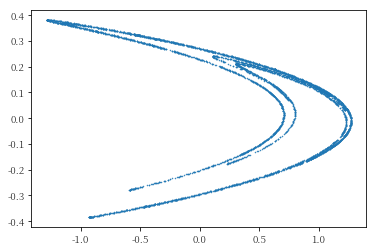

In [116]:
plot_Henon(X0, a,b,N)

In [121]:
%matplotlib qt
plot_Henon(X0, a,b,100000)

In [122]:
%matplotlib inline

$${\displaystyle {\begin{cases}x_{n+1}=1-ax_{n}^{2}+y_{n}\\y_{n+1}=bx_{n}.\end{cases}}}$$

Hénon可分解为3步:
一是$y$方向拉伸，
$${\displaystyle (x_{1},y_{1})=(x,1-ax^{2}+y)\,}$$
二是$x$方向收缩，
$${\displaystyle (x_{2},y_{2})=(bx_{1},y_{1})\,}$$
三是对$y = x$反射:
$${\displaystyle (x_{3},y_{3})=(y_{2},x_{2})\,}.$$
仔细观察轨道是怎样被拉伸和折叠的。


https://en.wikipedia.org/wiki/H%C3%A9non_map

<img src="Henon_map.gif" width="65%"/>


# 练习
1. 给出周期4的稳定性条件
1. 用数值方法求出另一个费根鲍姆常数$\alpha$的近似值。
1. 画出$x_{n+1}=1- a x_n^2$的分岔图
1. 分析$x_{n+1}=\alpha x_n e^{-\beta x_n^3}$的不动点的稳定性

## 画出$x_{n+1}=\lambda \sin \pi x_n$的分岔图
## 分析$x_{n+1}=\frac{a x_n}{1+(\frac{x_n}{b})^3}$的不动点的稳定性
## 求出Hénon映射不动点并分析其稳定性。